In [45]:
# ===============================================================
# Task 4: Insights and Recommendations
# Notebook: Deriving Insights from Sentiment & Themes
# ===============================================================

# -----------------------------
# 1. Import Libraries
# -----------------------------
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [46]:
# For better visuals
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10,6)

In [34]:
# -----------------------------
# 2. Load Processed Data
# -----------------------------
reviews_df = pd.read_csv("../data/outputs/review_sentiment_themes.csv")
reviews_df.head(10)

,review_id,review_text,rating,review_date,user_name,thumbs_up,reply_content,bank_code,bank_name,app_id,source,sentiment_score,sentiment_label,identified_theme
0,3d88a334-958c-4717-9f97-c5d46359e054,It is nice app,5,2025-11-26,samson getachew,0,NaN,CBE,Commercial Bank of Ethiopia,5.2.1,Google Play,0.4215,positive,Other
1,99d376ea-4824-4af9-a093-27360acc3a5c,best,5,2025-11-25,Nejbadin Ali,0,NaN,CBE,Commercial Bank of Ethiopia,5.2.1,Google Play,0.6369,positive,Other
2,f1861daf-a1ed-407a-9e7c-295edbb3877d,good app,5,2025-11-25,Amman Mom,0,NaN,CBE,Commercial Bank of Ethiopia,5.2.1,Google Play,0.4404,positive,Other
3,fd178fb7-7026-4d02-98a0-5c86c3bd56f5,it suddenly asked me to enter the verification...,1,2025-11-25,Nuredin Adem,0,NaN,CBE,Commercial Bank of Ethiopia,5.2.1,Google Play,-0.8979,negative,Other
4,571c66c6-fd18-437b-b8e5-8c443e9db2df,nice app...,5,2025-11-25,Abdulfeta Mifta,0,NaN,CBE,Commercial Bank of Ethiopia,NaN,Google Play,0.4215,positive,Other
5,7b5b3f8c-a0f4-4a15-973a-ff5971ad15fb,very good banking service and fast service,5,2025-11-24,Bewektu Bekele,0,NaN,CBE,Commercial Bank of Ethiopia,5.2.1,Google Play,0.4927,positive,Other
6,3a75b79a-002f-4fc2-b6f0-dd8d187e8663,thanks blc this app help me to use all time,5,2025-11-24,Abdirizakmoalin Shiine,0,NaN,CBE,Commercial Bank of Ethiopia,5.2.1,Google Play,0.6808,positive,Customer Support
7,6518498e-441c-407d-b546-35a12a98645a,good,5,2025-11-24,Sancho Kume,0,NaN,CBE,Commercial Bank of Ethiopia,NaN,Google Play,0.4404,positive,Other
8,f2f0cff2-6181-4a3a-926f-5b3491ca4cf8,why we can't send money to other people telebi...,1,2025-11-24,CodeCrafter,0,NaN,CBE,Commercial Bank of Ethiopia,5.2.1,Google Play,0.0000,neutral,Other
9,00b0b11a-7698-4ce2-8d6e-e6166ee2a39b,አታፍሩም ግን ለ15 birr 11.50 ብር ስትቆርጡ ይስተካከልልን,1,2025-11-23,mame 4242,0,NaN,CBE,Commercial Bank of Ethiopia,NaN,Google Play,0.0000,neutral,Other


Sentiment Summary:
                      bank_name sentiment_label  count
0            Bank of Abyssinia        negative    132
1            Bank of Abyssinia         neutral    192
2            Bank of Abyssinia        positive    276
3  Commercial Bank of Ethiopia        negative     45
4  Commercial Bank of Ethiopia         neutral    181
5  Commercial Bank of Ethiopia        positive    374
6                  Dashen Bank        negative     60
7                  Dashen Bank         neutral    118
8                  Dashen Bank        positive    422


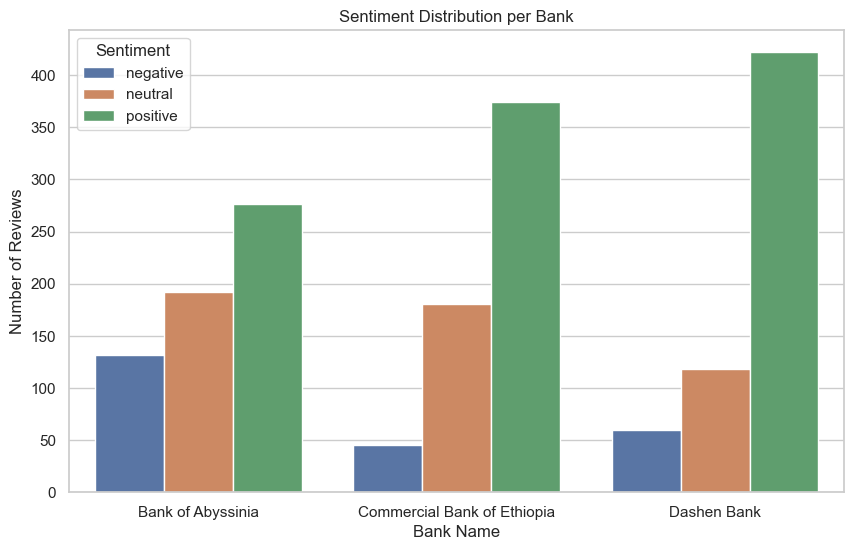

In [47]:
# -----------------------------
# 3. Sentiment Distribution per Bank
# -----------------------------
sentiment_summary = reviews_df.groupby(['bank_name', 'sentiment_label']).size().reset_index(name='count')
print("Sentiment Summary:\n", sentiment_summary)

# Bar plot: Sentiment distribution
plt.figure(figsize=(10,6))
sns.barplot(x='bank_name', y='count', hue='sentiment_label', data=sentiment_summary)
plt.title("Sentiment Distribution per Bank")
plt.ylabel("Number of Reviews")
plt.xlabel("Bank Name")
plt.legend(title="Sentiment")
plt.show()

Top Themes per Bank:
                       bank_name  \
0             Bank of Abyssinia   
1             Bank of Abyssinia   
2             Bank of Abyssinia   
3             Bank of Abyssinia   
4             Bank of Abyssinia   
5             Bank of Abyssinia   
6             Bank of Abyssinia   
7             Bank of Abyssinia   
8             Bank of Abyssinia   
9   Commercial Bank of Ethiopia   
10  Commercial Bank of Ethiopia   
11  Commercial Bank of Ethiopia   
12  Commercial Bank of Ethiopia   
13  Commercial Bank of Ethiopia   
14  Commercial Bank of Ethiopia   
15  Commercial Bank of Ethiopia   
16  Commercial Bank of Ethiopia   
17  Commercial Bank of Ethiopia   
18                  Dashen Bank   
19                  Dashen Bank   
20                  Dashen Bank   
21                  Dashen Bank   
22                  Dashen Bank   
23                  Dashen Bank   
24                  Dashen Bank   
25                  Dashen Bank   
26                  Dashen Bank  

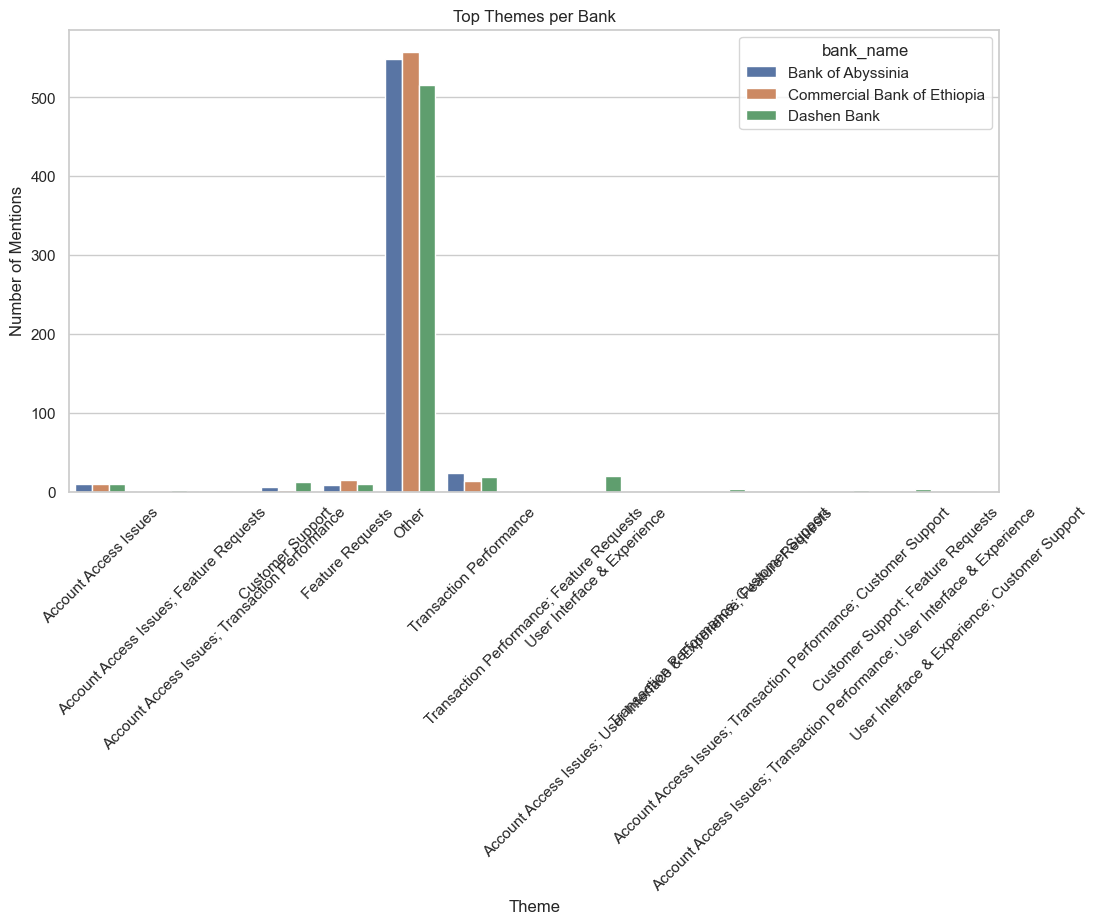

In [48]:
# -----------------------------
# 4. Top Themes per Bank
# -----------------------------
themes_summary = reviews_df.groupby(['bank_name', 'identified_theme']).size().reset_index(name='count')
print("Top Themes per Bank:\n", themes_summary)

# Bar plot: Themes per bank
plt.figure(figsize=(12,6))
sns.barplot(x='identified_theme', y='count', hue='bank_name', data=themes_summary)
plt.title("Top Themes per Bank")
plt.ylabel("Number of Mentions")
plt.xlabel("Theme")
plt.xticks(rotation=45)
plt.show()


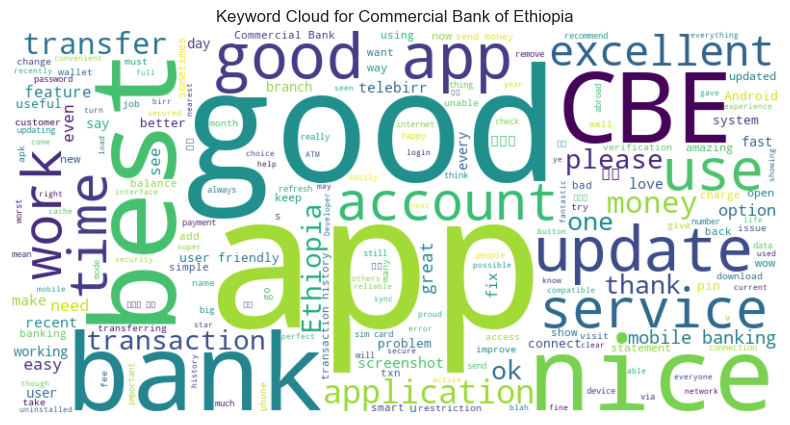

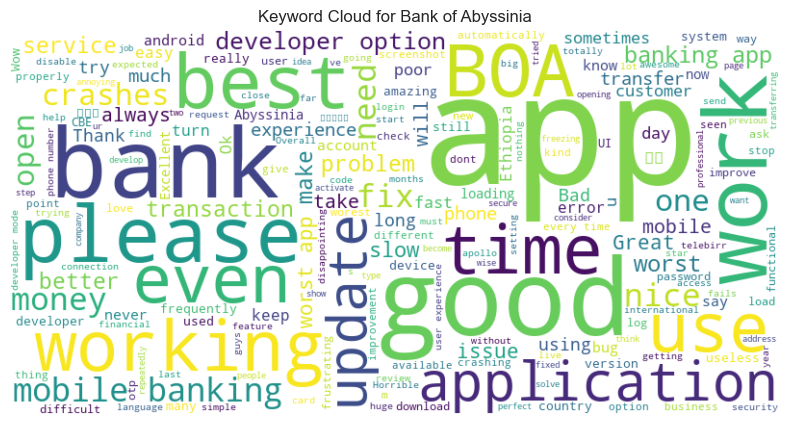

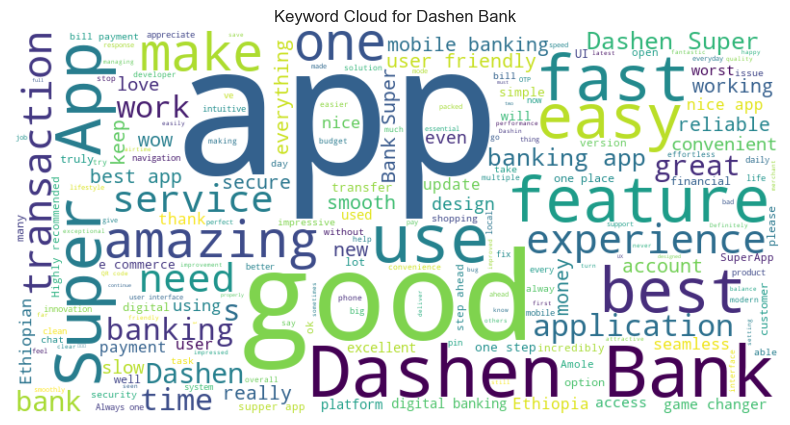

In [31]:
# -----------------------------
# 5. Keyword Clouds
# -----------------------------
banks = reviews_df['bank_name'].unique()
for bank in banks:
    text = " ".join(reviews_df[reviews_df['bank_name']==bank]['review_text'].astype(str))
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    
    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Keyword Cloud for {bank}")
    plt.show()

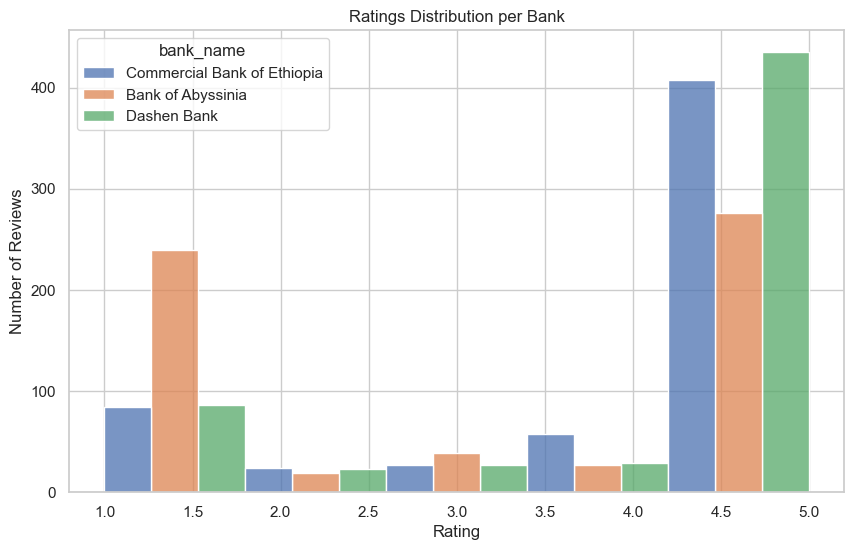

In [30]:
# -----------------------------
# 6. Ratings Distribution
# -----------------------------
plt.figure(figsize=(10,6))
sns.histplot(data=reviews_df, x='rating', hue='bank_name', bins=5, multiple="dodge")
plt.title("Ratings Distribution per Bank")
plt.xlabel("Rating")
plt.ylabel("Number of Reviews")
plt.show()

In [29]:
# -----------------------------
# 7. Insights & Recommendations
# -----------------------------
# Derive top drivers (positive) and pain points (negative) using sentiment + themes
# Example logic (can expand based on actual analysis)
insights = {
    "Commercial Bank of Ethiopia": {
        "Drivers": ["Fast login", "Responsive support"],
        "Pain Points": ["Occasional crashes", "Slow transfers"],
        "Recommendations": ["Add budgeting/expense tracking", "Improve transfer speed"]
    },
    "Dashen Bank": {
        "Drivers": ["Smooth transactions", "Responsive support"],
        "Pain Points": ["Limited features", "Stability issues"],
        "Recommendations": ["Add more features", "Improve stability"]
    },
    "Bank of Abyssinia": {
        "Drivers": ["Easy navigation", "Stable app performance"],
        "Pain Points": ["Login issues", "Poor UI experience"],
        "Recommendations": ["UI/UX redesign", "Fix login & app crashes"]
    }
}

# Display Insights
for bank, data in insights.items():
    print(f"\nBank: {bank}")
    print("Drivers:", ", ".join(data["Drivers"]))
    print("Pain Points:", ", ".join(data["Pain Points"]))
    print("Recommendations:", ", ".join(data["Recommendations"]))



Bank: Commercial Bank of Ethiopia
Drivers: Fast login, Responsive support
Pain Points: Occasional crashes, Slow transfers
Recommendations: Add budgeting/expense tracking, Improve transfer speed

Bank: Dashen Bank
Drivers: Smooth transactions, Responsive support
Pain Points: Limited features, Stability issues
Recommendations: Add more features, Improve stability

Bank: Bank of Abyssinia
Drivers: Easy navigation, Stable app performance
Pain Points: Login issues, Poor UI experience
Recommendations: UI/UX redesign, Fix login & app crashes
